In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [17]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [39]:
# function to download all listings data
def get_listings_amsterdam_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Amsterdam')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/Amsterdam_{date}.csv',index=False)
get_listings_amsterdam_timeseries()

In [53]:
# pull in detailed_listings
raw_df_amsterdam = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_amsterdam)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(amsterdam_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 5402 AirBnb listings.


In [43]:
amsterdam_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/Amsterdam_2020-12.csv')
amsterdam_raw_df_12_12_2020.shape





(18522, 16)

In [54]:
# use magic commands 'cd' to change directory
# use glob to locate all files for amsterdam
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_amsterdam = glob.glob('amsterdam/**.csv')
files_amsterdam

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['amsterdam/Amsterdam_2021-07.csv',
 'amsterdam/Amsterdam_2021-06.csv',
 'amsterdam/Amsterdam_2021-04.csv',
 'amsterdam/Amsterdam_2021-10.csv',
 'amsterdam/Amsterdam_2021-11.csv',
 'amsterdam/Amsterdam_2021-05.csv',
 'amsterdam/Amsterdam_2021-01.csv',
 'amsterdam/Amsterdam_2021-02.csv',
 'amsterdam/Amsterdam_2021-03.csv',
 'amsterdam/Amsterdam_2020-12.csv',
 'amsterdam/Amsterdam_2021-08.csv',
 'amsterdam/Amsterdam_2021-09.csv']

In [55]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

amsterdam_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(amsterdam_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_12_12_2020['price'].mean(),2)}.")

amsterdam_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(amsterdam_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_1_9_2021['price'].mean(),2)}.")

amsterdam_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(amsterdam_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_2_8_2021['price'].mean(),2)}.")

amsterdam_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(amsterdam_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_3_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(amsterdam_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_4_9_2021['price'].mean(),2)}.")

amsterdam_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-05.csv')
print(f"The 5_19_2021 dataset contains {len(amsterdam_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_5_19_2021['price'].mean(),2)}.")

amsterdam_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(amsterdam_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_6_3_2021['price'].mean(),2)}.")

amsterdam_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(amsterdam_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_7_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(amsterdam_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_8_6_2021['price'].mean(),2)}.")

amsterdam_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(amsterdam_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_9_7_2021['price'].mean(),2)}.")

amsterdam_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(amsterdam_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_10_6_2021['price'].mean(),2)}.")

amsterdam_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-11.csv')
print(f"The 11_4_2021 dataset contains {len(amsterdam_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 18522 AirBnb listings; the avg price is €154.0.
The 1_9_2021 dataset contains 18395 AirBnb listings; the avg price is €152.58.
The 2_8_2021 dataset contains 18291 AirBnb listings; the avg price is €153.06.
The 3_4_2021 dataset contains 18201 AirBnb listings; the avg price is €153.72.
The 4_9_2021 dataset contains 17825 AirBnb listings; the avg price is €154.5.
The 5_19_2021 dataset contains 17031 AirBnb listings; the avg price is €153.73.
The 6_3_2021 dataset contains 16973 AirBnb listings; the avg price is €154.17.
The 7_4_2021 dataset contains 16724 AirBnb listings; the avg price is €156.16.
The 8_6_2021 dataset contains 16478 AirBnb listings; the avg price is €156.87.
The 9_7_2021 dataset contains 16116 AirBnb listings; the avg price is €156.91.
The 10_6_2021 dataset contains 5389 AirBnb listings; the avg price is €166.99.
The 11_4_2021 dataset contains 5402 AirBnb listings; the avg price is €169.0.


In [56]:
df_list_amsterdam = [amsterdam_raw_df_12_12_2020, amsterdam_raw_df_1_9_2021, amsterdam_raw_df_2_8_2021,
           amsterdam_raw_df_3_4_2021, amsterdam_raw_df_4_9_2021, amsterdam_raw_df_5_19_2021, amsterdam_raw_df_6_3_2021, amsterdam_raw_df_7_4_2021,
           amsterdam_raw_df_8_6_2021, amsterdam_raw_df_9_7_2021, amsterdam_raw_df_10_6_2021, amsterdam_raw_df_11_4_2021]

dates_amsterdam = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_amsterdam = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10', '2021-11']


df_final_amsterdam = []

def airbnb_parse_amsterdam(df_list, files):
    for file in files_amsterdam:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_{file}.csv")
        print(f"The {file} Amsterdam dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_amsterdam(df_list, dates):
    for file in files_amsterdam:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_amsterdam.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_amsterdam)

amsterdam_parse = airbnb_parse_amsterdam(df_list_amsterdam, files_amsterdam)


The 2020-12 Amsterdam dataset contains 18522 AirBnb listings -- the avg price is €154.0.
The 2021-01 Amsterdam dataset contains 18395 AirBnb listings -- the avg price is €152.58.
The 2021-02 Amsterdam dataset contains 18291 AirBnb listings -- the avg price is €153.06.
The 2021-03 Amsterdam dataset contains 18201 AirBnb listings -- the avg price is €153.72.
The 2021-04 Amsterdam dataset contains 17825 AirBnb listings -- the avg price is €154.5.
The 2021-05 Amsterdam dataset contains 17031 AirBnb listings -- the avg price is €153.73.
The 2021-06 Amsterdam dataset contains 16973 AirBnb listings -- the avg price is €154.17.
The 2021-07 Amsterdam dataset contains 16724 AirBnb listings -- the avg price is €156.16.
The 2021-08 Amsterdam dataset contains 16478 AirBnb listings -- the avg price is €156.87.
The 2021-09 Amsterdam dataset contains 16116 AirBnb listings -- the avg price is €156.91.
The 2021-10 Amsterdam dataset contains 5389 AirBnb listings -- the avg price is €166.99.
The 2021-11 A

In [57]:
amsterdam_summary = airbnb_to_frame_amsterdam(df_list_amsterdam, files_amsterdam)
amsterdam_summary['Date of scrape'] = pd.to_datetime(amsterdam_summary['Date of scrape'])
amsterdam_summary['City'] = 'Amsterdam'
amsterdam_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,18522,154.00,128.0,0,8000,0.64,Amsterdam
1,2021-01-01,18395,152.58,126.0,0,8000,0.61,Amsterdam
2,2021-02-01,18291,153.06,128.0,0,8000,0.59,Amsterdam
3,2021-03-01,18201,153.72,129.0,0,8000,0.58,Amsterdam
4,2021-04-01,17825,154.50,129.0,0,8000,0.56,Amsterdam
5,2021-05-01,17031,153.73,128.0,0,8000,0.55,Amsterdam
6,2021-06-01,16973,154.17,128.0,0,8000,0.61,Amsterdam
7,2021-07-01,16724,156.16,129.0,0,8000,0.61,Amsterdam
8,2021-08-01,16478,156.87,130.0,0,8000,0.64,Amsterdam
9,2021-09-01,16116,156.91,130.0,0,8000,0.68,Amsterdam


In [58]:
master_df_amsterdam = pd.concat(df_list_amsterdam)
master_df_amsterdam_unique = master_df_amsterdam.drop_duplicates(subset='id')
master_df_amsterdam_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.95,1,123,NaN,NaN
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,236,1,339,2020-04-09,2.58,2,3,NaN,NaN
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.14,1,33,NaN,NaN
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,219,2020-07-25,2.01,1,219,NaN,NaN
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.68,2,346,NaN,NaN


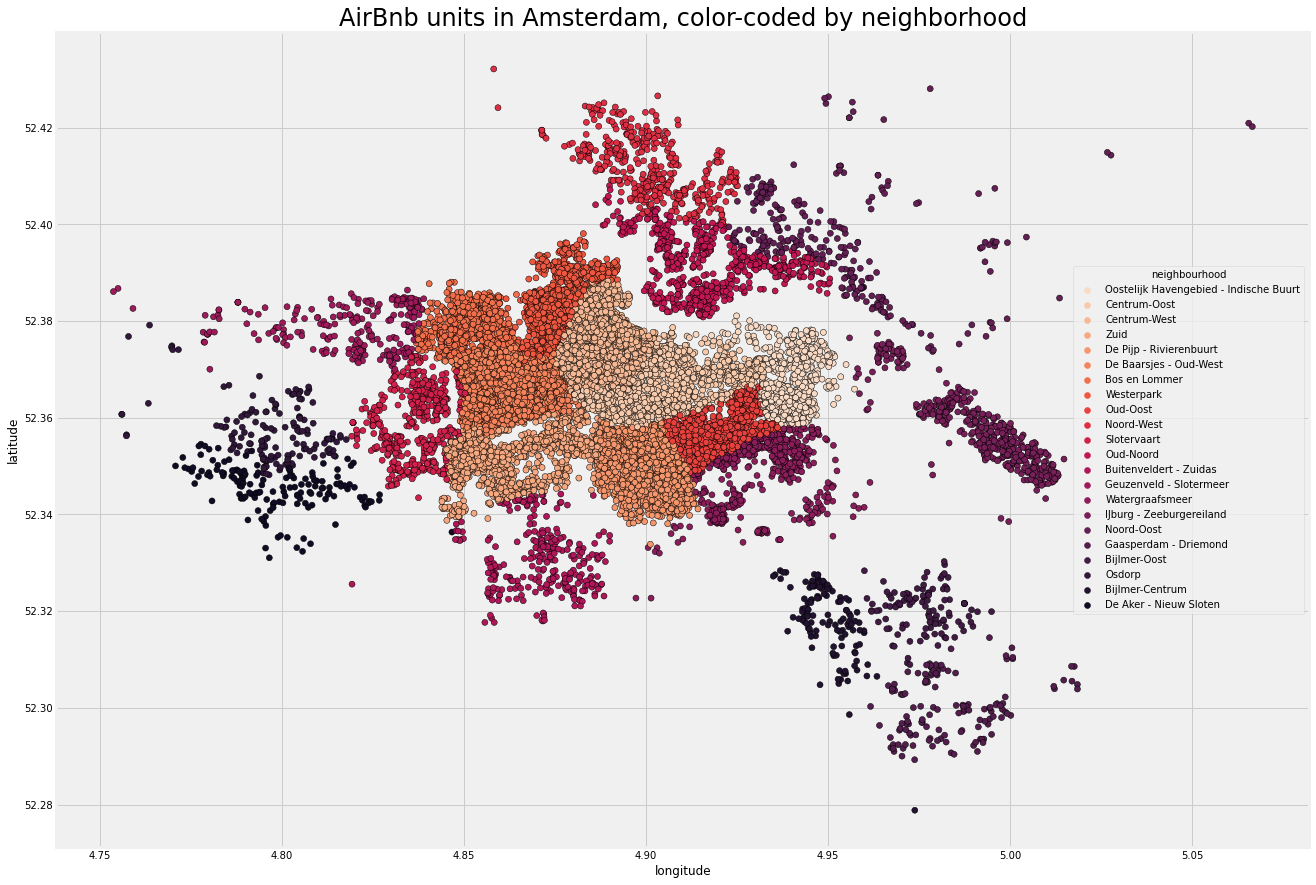

In [132]:
title = 'AirBnb units in Amsterdam, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("rocket_r")
sns.scatterplot(master_df_amsterdam_unique.longitude, master_df_amsterdam_unique.latitude, hue = master_df_amsterdam_unique.neighbourhood, palette='rocket_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_amsterdam.png')
plt.show()

## Add review data throguh a join

In [110]:
df_reviews = pd.concat([amsterdam_raw_df_11_4_2021,raw_df_amsterdam],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,59,...,4.93,5.00,4.98,4.98,4.68,4.81,t,0,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.364070,4.893930,Private room,106,...,4.69,4.79,4.63,4.62,4.87,4.49,t,0,2,0
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.387610,4.891880,Private room,135,...,4.93,4.96,4.95,4.92,4.90,4.80,t,0,1,0
3,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367750,4.890920,Private room,75,...,4.94,4.89,4.97,4.94,4.97,4.82,f,0,2,0
4,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.365840,4.891110,Private room,55,...,4.87,4.83,4.91,4.90,4.86,4.75,f,0,2,0
5,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,NaN,Centrum-Oost,52.371680,4.914710,Entire home/apt,240,...,4.66,4.44,4.94,4.90,4.66,4.46,f,1,0,0
6,47061,Charming apartment in old centre,211696,Ivar,NaN,De Baarsjes - Oud-West,52.367860,4.874580,Entire home/apt,120,...,4.77,4.63,4.75,4.89,4.83,4.63,f,1,0,0
7,49552,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP,NaN,Centrum-West,52.380280,4.890890,Entire home/apt,157,...,4.91,4.89,4.95,4.96,4.98,4.75,f,1,0,0
8,49790,Luxurous Houseboat-Great Location,227530,Klaas,NaN,De Baarsjes - Oud-West,52.361580,4.861010,Entire home/apt,250,...,4.96,4.81,4.91,4.98,4.81,4.73,f,1,0,0
9,50523,B & B de 9 Straatjes (city center),231946,Raymond,NaN,Centrum-West,52.368110,4.882620,Private room,118,...,4.90,4.89,4.87,4.85,4.95,4.83,f,0,1,0


## Regression

In [134]:
df_reviews_.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'listing_url',
       'scrape_id', 'last_scraped', 'description', 'neighborhood_overview',
       'picture_url', 'host_url', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'accommodates', 'bathrooms', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'maximum_nights',

In [138]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [139]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -398.73263556395364
Coefficients:  [ 28.73951353  42.9346293   -7.56659749   0.71479456  12.29583023
  21.51536785  25.3036015   84.89851528 -59.24575722]
LinearRegression()


In [140]:
y_pred2 = regr.predict(X_)

In [141]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result

,Actual,Predicted,Diff
2397,400,76.823175,-323.176825
2779,400,109.495968,-290.504032
615,381,102.393013,-278.606987
120,395,125.152600,-269.847400
4704,400,149.293516,-250.706484
2537,399,159.543776,-239.456224
4558,397,169.046383,-227.953617
2753,375,154.110548,-220.889452
3613,348,130.699200,-217.300800
4383,350,137.264134,-212.735866


<function matplotlib.pyplot.ylim(*args, **kwargs)>

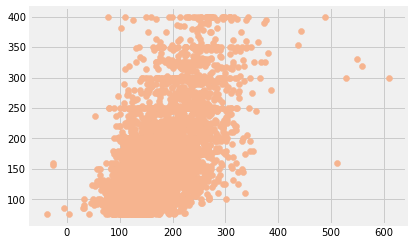

In [142]:
x = df_result['Predicted']
y = df_result['Actual']
plt.scatter(x,y)
plt.ylim